## Loading necessary libraries

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

## Loading the dataset

In [35]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
data = pd.read_csv(url, index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Selecting a subset of features for simplicity

In [37]:
X = data[['TV', 'radio', 'newspaper']]
y = data['sales']


In [38]:
## Scaling the features for standardization

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Train-Test split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Linear - Ridge - Lasso Regression models 

In [48]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Ridge Regression with Cross-Validation
ridge_params = {'alpha': np.logspace(-3, 3, 100)}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

# Lasso Regression with Cross-Validation
lasso_params = {'alpha': np.logspace(-3, 3, 100)}
lasso_grid = GridSearchCV(Lasso(max_iter=10000), lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)


## Metrics and Comparing the models

Linear Regression:
R^2 Score: 0.8994
Mean Squared Error: 3.1741
Coefficients: [3.83060599 2.80191171 0.05998274]
Intercept: 14.042004239811021


Ridge Regression:
R^2 Score: 0.8982
Mean Squared Error: 3.2143
Coefficients: [3.80686771 2.78278342 0.06789983]
Intercept: 14.042549482371937


Lasso Regression:
R^2 Score: 0.8978
Mean Squared Error: 3.2254
Coefficients: [3.732158   2.72824955 0.        ]
Intercept: 14.041814808131882




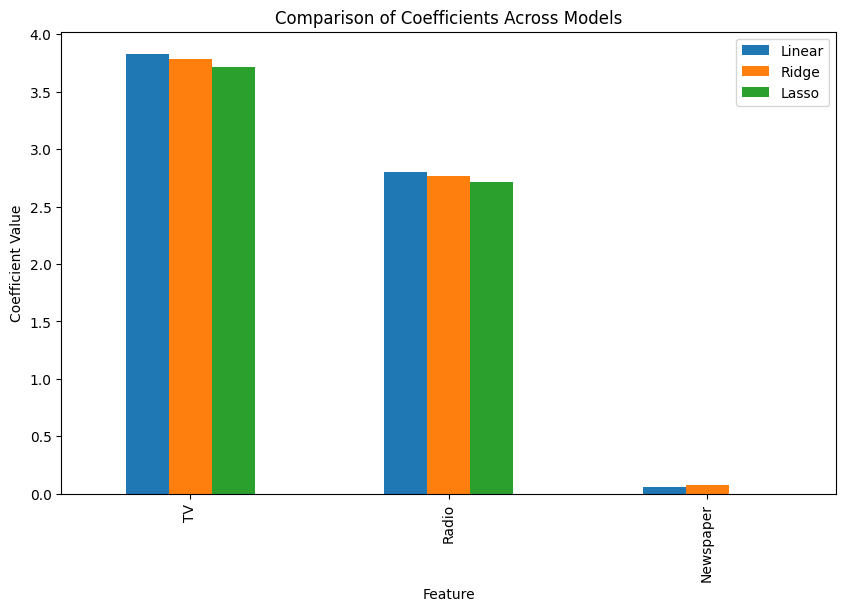

In [49]:
# Metrics and Coefficients
def print_metrics(name, model, y_test, y_pred):
    print(f"{name} Regression:")
    print(f"R^2 Score: {r2_score(y_test, y_pred):.4f}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    print("\n")

print_metrics("Linear", linear_model, y_test, y_pred_linear)
print_metrics("Ridge", ridge_model, y_test, y_pred_ridge)
print_metrics("Lasso", lasso_model, y_test, y_pred_lasso)

# Visualization of Coefficients
coefficients_df = pd.DataFrame({
    'Feature': ['TV', 'Radio', 'Newspaper'],
    'Linear': linear_model.coef_,
    'Ridge': best_ridge.coef_,
    'Lasso': best_lasso.coef_
})

coefficients_df.set_index('Feature').plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Coefficients Across Models')
plt.ylabel('Coefficient Value')
plt.show()


# Regularization paths for Ridge and Lasso

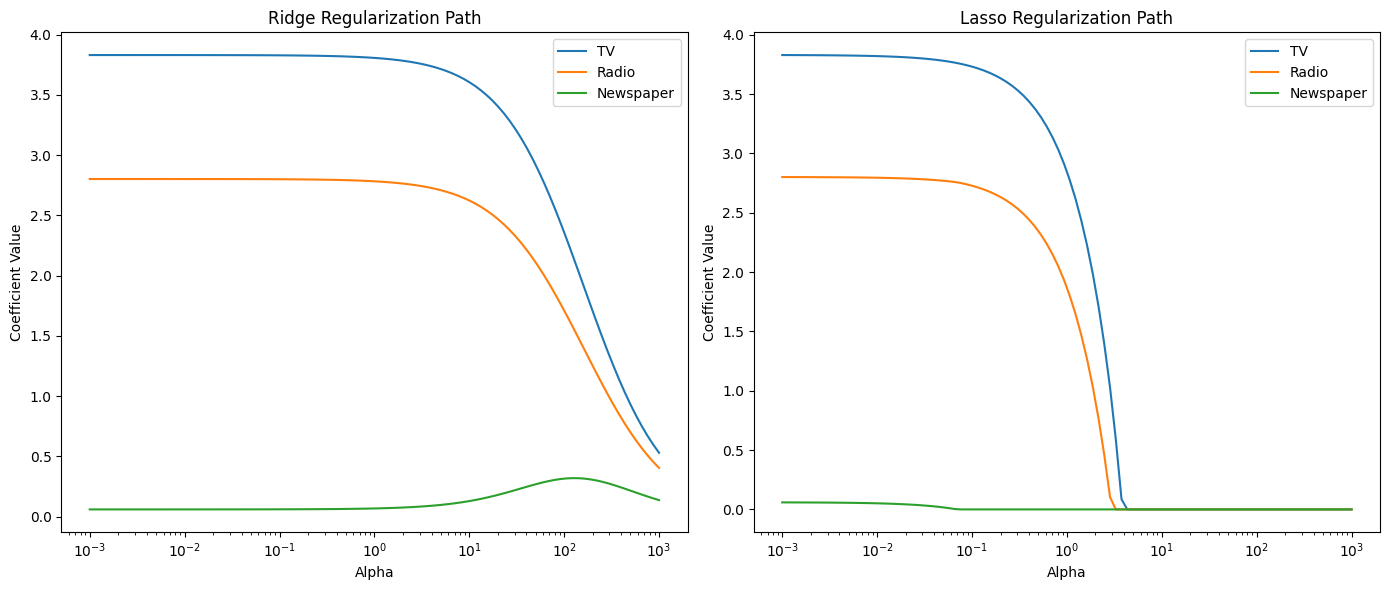

In [50]:
# Regularization Paths for Ridge and Lasso
alphas = np.logspace(-3, 3, 100)
ridge_coefs = []
lasso_coefs = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_coefs.append(ridge.coef_)

    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    lasso_coefs.append(lasso.coef_)

ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)

# Plot Regularization Paths
plt.figure(figsize=(14, 6))

# Ridge Regularization Path
plt.subplot(1, 2, 1)
for i in range(ridge_coefs.shape[1]):
    plt.plot(alphas, ridge_coefs[:, i], label=f'Feature {i+1}')
plt.xscale('log')
plt.title('Ridge Regularization Path')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.legend(['TV', 'Radio', 'Newspaper'])

# Lasso Regularization Path
plt.subplot(1, 2, 2)
for i in range(lasso_coefs.shape[1]):
    plt.plot(alphas, lasso_coefs[:, i], label=f'Feature {i+1}')
plt.xscale('log')
plt.title('Lasso Regularization Path')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.legend(['TV', 'Radio', 'Newspaper'])

plt.tight_layout()
plt.show()